In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

**Do dataset là tương tự nhau về hình thức nên sẽ chỉ thực hiện dự đoán với cổ phiếu của FPT, còn các cổ phiếu khác thì chỉ cần thực hiện tương tự là được**

# FPT

## Tiền xử lý dữ liệu

In [3]:
FPT = pd.read_csv('https://drive.google.com/uc?id=1zzTe4jmSgFfuQhwN9bINtW6bUITg8AQD&export=download')

In [4]:
FPT_u = FPT.dropna(how="all")
FPT_u = FPT_u.drop(columns=['Open Interest'])

FPT_u['Close_next'] = FPT_u['Close'].shift(-1)
FPT_u['Value_difference'] = FPT_u['Close_next'] - FPT_u['Close']
FPT_u = FPT_u.dropna()

## Phân tích dữ liệu

In [5]:
print(FPT_u.head())

  Ticker        Date/Time   Open   High    Low  Close  Volume  Close_next  \
0    FPT  12/25/2018 9:15  30.89  30.89  30.89  30.89   35410       30.81   
1    FPT  12/25/2018 9:16  30.81  30.81  30.81  30.81     190       30.74   
2    FPT  12/25/2018 9:17  30.74  30.81  30.74  30.74    1120       30.74   
3    FPT  12/25/2018 9:18  30.74  30.74  30.74  30.74    2120       30.74   
4    FPT  12/25/2018 9:19  30.74  30.74  30.74  30.74   22500       30.74   

   Value_difference  
0             -0.08  
1             -0.07  
2              0.00  
3              0.00  
4              0.00  


In [6]:
print(FPT_u.describe())

               Open          High           Low         Close        Volume  \
count  97405.000000  97405.000000  97405.000000  97405.000000  9.740500e+04   
mean      45.071496     45.090005     45.051296     45.071497  8.044141e+03   
std        6.359699      6.364846      6.354141      6.359694  1.753211e+04   
min       30.250000     30.250000     30.220000     30.250000  1.000000e+01   
25%       39.740000     39.740000     39.700000     39.740000  7.500000e+02   
50%       46.950000     46.950000     46.950000     46.950000  2.960000e+03   
75%       49.200000     49.250000     49.170000     49.200000  8.960000e+03   
max       58.400000     58.500000     58.400000     58.400000  1.255930e+06   

         Close_next  Value_difference  
count  97405.000000      97405.000000  
mean      45.071777          0.000279  
std        6.359669          0.063485  
min       30.250000         -2.390000  
25%       39.740000          0.000000  
50%       46.950000          0.000000  
75%     

In [7]:
# Tính toán mức độ tương quan
correlation_matrix = FPT_u.corr()
print(correlation_matrix)

                      Open      High       Low     Close    Volume  \
Open              1.000000  0.999982  0.999980  0.999970  0.077918   
High              0.999982  1.000000  0.999968  0.999982  0.078938   
Low               0.999980  0.999968  1.000000  0.999980  0.076824   
Close             0.999970  0.999982  0.999980  1.000000  0.077942   
Volume            0.077918  0.078938  0.076824  0.077942  1.000000   
Close_next        0.999935  0.999944  0.999940  0.999950  0.078254   
Value_difference -0.003941 -0.004198 -0.004357 -0.005390  0.031207   

                  Close_next  Value_difference  
Open                0.999935         -0.003941  
High                0.999944         -0.004198  
Low                 0.999940         -0.004357  
Close               0.999950         -0.005390  
Volume              0.078254          0.031207  
Close_next          1.000000          0.004592  
Value_difference    0.004592          1.000000  


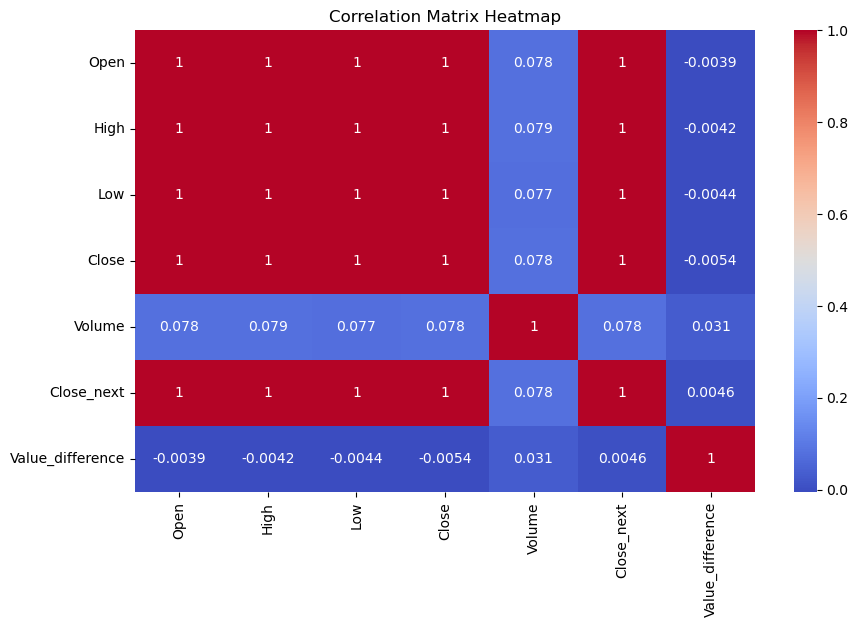

In [8]:
# Sử dụng heatmap để thể hiện độ tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Kết luận
- Mối tương quan cao giữa giá Open, High, Low, Close và Close_next theo cho thấy rằng các tính năng này có thể hữu ích chung trong việc dự đoán biến động giá cổ phiếu sắp tới. Sự tương quan chặt chẽ của chúng cho thấy rằng việc kết hợp nhiều đặc điểm giá có thể không tăng thêm sức mạnh dự đoán đáng kể ngoài những gì một hoặc hai đặc điểm đã cung cấp.
- Volume cho thấy mối tương quan rất thấp với các cột khác, cho thấy nó có thể không đóng góp đáng kể cho các mô hình dự đoán tập trung vào thay đổi giá từng phút.

## Kiểm tra mô hình

### Dự đoán Biến động giá cổ phiếu theo phút

In [9]:
# Xác định các yếu tố và mục tiêu dự đoán
inputCols = ["Open", "High", "Low", "Close", "Volume"]
X = FPT_u[inputCols]
y = FPT_u["Value_difference"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

neighbor:      5 | MSE_train_fold: 0.003165 | MSE_val_fold: 0.004742 | MSE_test: 0.005049
neighbor:     10 | MSE_train_fold: 0.003552 | MSE_val_fold: 0.00435 | MSE_test: 0.004675
neighbor:     15 | MSE_train_fold: 0.003679 | MSE_val_fold: 0.004205 | MSE_test: 0.004561
neighbor:     20 | MSE_train_fold: 0.003754 | MSE_val_fold: 0.004155 | MSE_test: 0.004493
neighbor:     25 | MSE_train_fold: 0.00379 | MSE_val_fold: 0.004104 | MSE_test: 0.00446
neighbor:     30 | MSE_train_fold: 0.003818 | MSE_val_fold: 0.004085 | MSE_test: 0.004432
neighbor:     35 | MSE_train_fold: 0.003838 | MSE_val_fold: 0.004066 | MSE_test: 0.004415
neighbor:     40 | MSE_train_fold: 0.003851 | MSE_val_fold: 0.004059 | MSE_test: 0.004404
neighbor:     45 | MSE_train_fold: 0.00386 | MSE_val_fold: 0.004041 | MSE_test: 0.004396
neighbor:     50 | MSE_train_fold: 0.00387 | MSE_val_fold: 0.004028 | MSE_test: 0.004391


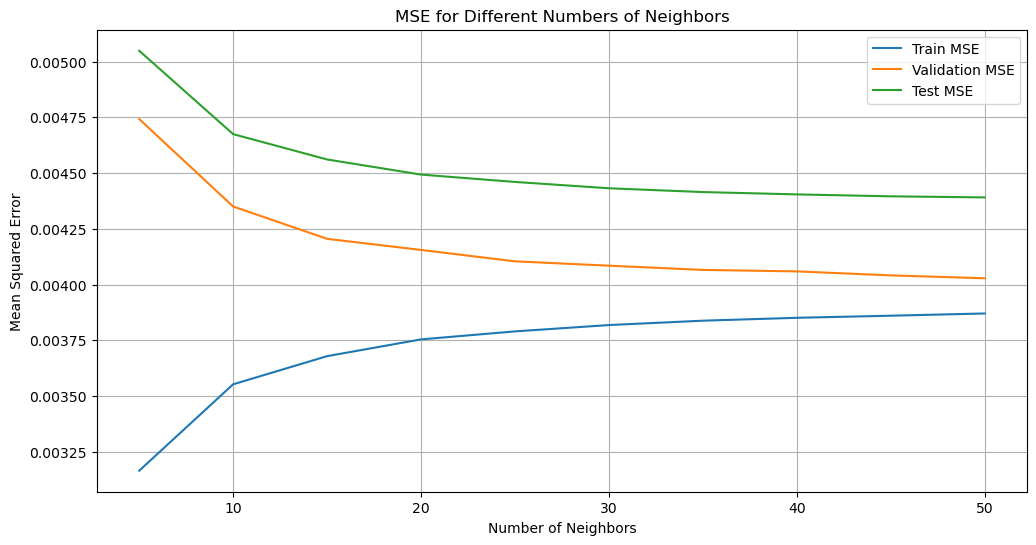

In [10]:
# K-Fold Cross Validation
numNeighbors = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
kf = KFold(n_splits=10, shuffle=True)

trainMSE = []
valMSE = []
testMSE = []

for neighbor in numNeighbors:
    train_fold_MSE = []
    val_fold_MSE = []
    test_MSE = []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        reg = KNeighborsRegressor(n_neighbors=neighbor, metric='minkowski', p=2, algorithm='kd_tree')
        reg.fit(X_train_fold, y_train_fold)

        y_train_fold_pred = reg.predict(X_train_fold)
        y_val_fold_pred = reg.predict(X_val_fold)
        y_test_pred = reg.predict(X_test)

        MSE_train_fold = mean_squared_error(y_train_fold, y_train_fold_pred)
        MSE_val_fold = mean_squared_error(y_val_fold, y_val_fold_pred)
        MSE_test = mean_squared_error(y_test, y_test_pred)

        train_fold_MSE.append(MSE_train_fold)
        val_fold_MSE.append(MSE_val_fold)
        test_MSE.append(MSE_test)

    trainMSE.append(np.mean(train_fold_MSE))
    valMSE.append(np.mean(val_fold_MSE))
    testMSE.append(np.mean(test_MSE))
    print('neighbor: {:6} | MSE_train_fold: {:6} | MSE_val_fold: {:6} | MSE_test: {:6}'.
          format(neighbor, round(np.mean(train_fold_MSE), 6), round(np.mean(val_fold_MSE), 6), round(np.mean(test_MSE), 6)))

# Biểu diễn kết quả dưới dạng đồ thị
plt.figure(figsize=(12, 6))
plt.plot(numNeighbors, trainMSE, label='Train MSE')
plt.plot(numNeighbors, valMSE, label='Validation MSE')
plt.plot(numNeighbors, testMSE, label='Test MSE')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different Numbers of Neighbors')
plt.legend()
plt.grid(True)
plt.show()
#Chọn số neighbor là 30 vì nó cân bằng giữa độ chính xác cũng như là tốc độ xử lý

In [11]:
# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
train_mse_lr = mean_squared_error(y_train, y_pred_train)
test_mse_lr = mean_squared_error(y_test, y_pred_test)
# Decision Tree model
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
train_mse_dt = mean_squared_error(y_train, y_pred_train)
test_mse_dt = mean_squared_error(y_test, y_pred_test)
# Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
train_mse_rf = mean_squared_error(y_train, y_pred_train)
test_mse_rf = mean_squared_error(y_test, y_pred_test)
# Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=1)
gb.fit(X_train, y_train)
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
train_mse_gb = mean_squared_error(y_train, y_pred_train)
test_mse_gb = mean_squared_error(y_test, y_pred_test)
# Neural Network model
nn = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=1)
nn.fit(X_train, y_train)
y_pred_train = nn.predict(X_train)
y_pred_test = nn.predict(X_test)
train_mse_nn = mean_squared_error(y_train, y_pred_train)
test_mse_nn = mean_squared_error(y_test, y_pred_test)

print(f"Linear Regression - Train MSE: {train_mse_lr}, Test MSE: {test_mse_lr}")
print(f"Decision Tree - Train MSE: {train_mse_dt}, Test MSE: {test_mse_dt}")
print(f"Random Forest - Train MSE: {train_mse_rf}, Test MSE: {test_mse_rf}")
print(f"Gradient Boosting - Train MSE: {train_mse_gb}, Test MSE: {test_mse_gb}")
print(f"Neural Network - Train MSE: {train_mse_nn}, Test MSE: {test_mse_nn}")

Linear Regression - Train MSE: 0.003727104695268655, Test MSE: 0.004098108680753732
Decision Tree - Train MSE: 0.00029623003304488077, Test MSE: 0.008142711695141771
Random Forest - Train MSE: 0.0008460688077726577, Test MSE: 0.004856805447225622
Gradient Boosting - Train MSE: 0.0036751201547864927, Test MSE: 0.004464919502731893
Neural Network - Train MSE: 0.008399870149936869, Test MSE: 0.008773300438066723


### Kết luận:
Sau khi đánh giá một số mô hình học máy, bao gồm K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Gradient Boosting và Neural Network, xác định rằng Linear Regression là phương pháp phù hợp nhất để dự đoán biến động giá cổ phiếu vào phút tiếp theo.

## Kiểm chứng mô hình

In [12]:
FPT_u.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Close_next,Value_difference
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,30.81,-0.08
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,30.74,-0.07
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,30.74,0.00
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,30.74,0.00
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,30.74,0.00


In [13]:
last_10_data = FPT_u[inputCols].tail(10)
predictions = lr.predict(last_10_data)
# Tạo dataframe kết quẩ
results = pd.DataFrame({
    'Date/Time': FPT_u['Date/Time'].tail(10).values,
    'Biến động giá cổ phiếu thực tế': FPT_u['Value_difference'].tail(10).values,
    'Biến động giá cổ phiếu': predictions
})
results['Sai sót trong dự đoán'] = results['Biến động giá cổ phiếu'] - results['Biến động giá cổ phiếu thực tế']
print(results)


          Date/Time  Biến động giá cổ phiếu thực tế  Biến động giá cổ phiếu  \
0  12/22/2020 14:18                             0.0                0.027302   
1  12/22/2020 14:19                             0.0               -0.000877   
2  12/22/2020 14:20                             0.0               -0.000597   
3  12/22/2020 14:21                             0.0               -0.000947   
4  12/22/2020 14:22                             0.1                0.026684   
5  12/22/2020 14:23                             0.0                0.002348   
6  12/22/2020 14:24                             0.0                0.001902   
7  12/22/2020 14:25                             0.0                0.000098   
8  12/22/2020 14:26                            -0.1               -0.001944   
9  12/22/2020 14:29                             0.0               -0.001653   

   Sai sót trong dự đoán  
0               0.027302  
1              -0.000877  
2              -0.000597  
3              -0.0009

### Dự đoán Biến động giá cổ phiếu theo giờ

In [14]:
FPT_u = FPT.dropna(how="all")
FPT_u.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [15]:
#Xử lý dữ liệu
FPT_u['Date/Time'] = pd.to_datetime(FPT_u['Date/Time'], format='%m/%d/%Y %H:%M')

# Chuyển Date/Time thành Date và Hour
FPT_u['Date'] = FPT_u['Date/Time'].dt.date
FPT_u['Hour'] = FPT_u['Date/Time'].dt.hour
columns_order = ['Ticker', 'Date', 'Hour', 'Open', 'High', 'Low', 'Close', 'Volume']
FPT_u = FPT_u[columns_order]

FPT_u = FPT_u.sort_values(['Date', 'Hour'])
FPT_hourly = FPT_u.groupby(['Date', 'Hour']).first().reset_index()
FPT_hourly = FPT_hourly.sort_values(['Date', 'Hour'])
print(FPT_hourly.head())
print(FPT_hourly.info())
print(f"Number of records: {len(FPT_hourly)}")

         Date  Hour Ticker   Open   High    Low  Close  Volume
0  2018-12-25     9    FPT  30.89  30.89  30.89  30.89   35410
1  2018-12-26     9    FPT  31.04  31.11  31.04  31.11    2650
2  2018-12-26    10    FPT  31.19  31.19  31.15  31.15    2970
3  2018-12-26    11    FPT  31.07  31.07  31.07  31.07     100
4  2018-12-26    13    FPT  30.96  30.96  30.96  30.96    1480
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2491 entries, 0 to 2490
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2491 non-null   object 
 1   Hour    2491 non-null   int64  
 2   Ticker  2491 non-null   object 
 3   Open    2491 non-null   float64
 4   High    2491 non-null   float64
 5   Low     2491 non-null   float64
 6   Close   2491 non-null   float64
 7   Volume  2491 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 175.1+ KB
None
Number of records: 2491


In [16]:
FPT_hourly['Close_next'] = FPT_hourly['Close'].shift(-1)
FPT_hourly['Value_difference'] = FPT_hourly['Close_next'] - FPT_hourly['Close']
FPT_hourly = FPT_hourly.dropna()
inputCols = ["Open", "High", "Low", "Close", "Volume"]
X = FPT_hourly[inputCols]
y = FPT_hourly["Value_difference"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

neighbor:      5 | MSE_train_fold: 0.076715 | MSE_val_fold: 0.11689 | MSE_test: 0.131977
neighbor:     10 | MSE_train_fold: 0.085882 | MSE_val_fold: 0.105811 | MSE_test: 0.124229
neighbor:     15 | MSE_train_fold: 0.089096 | MSE_val_fold: 0.101824 | MSE_test: 0.12127
neighbor:     20 | MSE_train_fold: 0.08994 | MSE_val_fold: 0.099108 | MSE_test: 0.120866
neighbor:     25 | MSE_train_fold: 0.090237 | MSE_val_fold: 0.097446 | MSE_test: 0.120159
neighbor:     30 | MSE_train_fold: 0.091063 | MSE_val_fold: 0.097393 | MSE_test: 0.120526
neighbor:     35 | MSE_train_fold: 0.091188 | MSE_val_fold: 0.096704 | MSE_test: 0.12033
neighbor:     40 | MSE_train_fold: 0.091241 | MSE_val_fold: 0.095981 | MSE_test: 0.11962
neighbor:     45 | MSE_train_fold: 0.091404 | MSE_val_fold: 0.095399 | MSE_test: 0.119533
neighbor:     50 | MSE_train_fold: 0.09148 | MSE_val_fold: 0.095124 | MSE_test: 0.119166
neighbor:     55 | MSE_train_fold: 0.091631 | MSE_val_fold: 0.09483 | MSE_test: 0.119486
neighbor:     60 

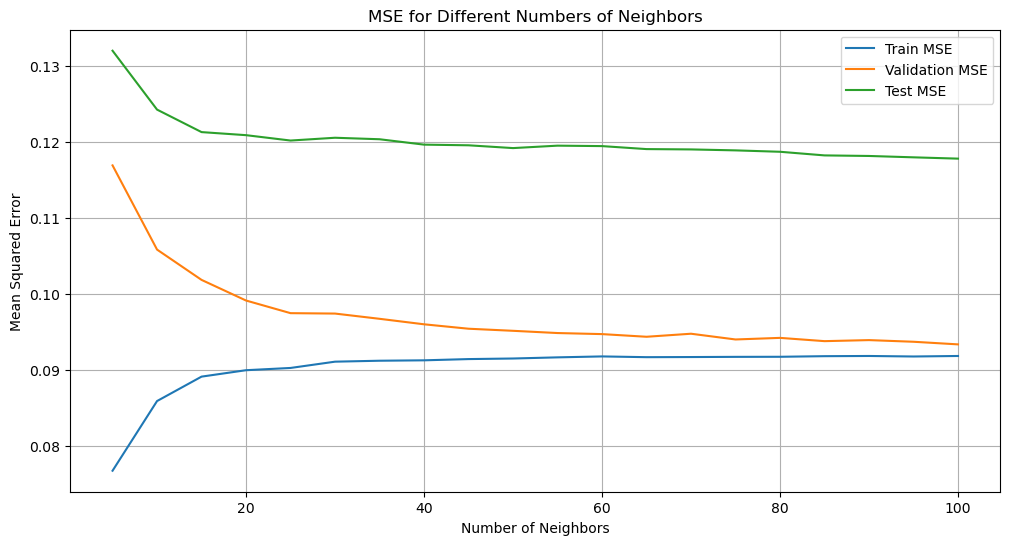

In [17]:
# Perform K-Fold Cross Validation
numNeighbors = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
kf = KFold(n_splits=10, shuffle=True)

trainMSE = []
valMSE = []
testMSE = []

for neighbor in numNeighbors:
    train_fold_MSE = []
    val_fold_MSE = []
    test_MSE = []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        reg = KNeighborsRegressor(n_neighbors=neighbor, metric='minkowski', p=2, algorithm='kd_tree')
        reg.fit(X_train_fold, y_train_fold)

        y_train_fold_pred = reg.predict(X_train_fold)
        y_val_fold_pred = reg.predict(X_val_fold)
        y_test_pred = reg.predict(X_test)

        MSE_train_fold = mean_squared_error(y_train_fold, y_train_fold_pred)
        MSE_val_fold = mean_squared_error(y_val_fold, y_val_fold_pred)
        MSE_test = mean_squared_error(y_test, y_test_pred)

        train_fold_MSE.append(MSE_train_fold)
        val_fold_MSE.append(MSE_val_fold)
        test_MSE.append(MSE_test)

    trainMSE.append(np.mean(train_fold_MSE))
    valMSE.append(np.mean(val_fold_MSE))
    testMSE.append(np.mean(test_MSE))
    print('neighbor: {:6} | MSE_train_fold: {:6} | MSE_val_fold: {:6} | MSE_test: {:6}'.
          format(neighbor, round(np.mean(train_fold_MSE), 6), round(np.mean(val_fold_MSE), 6), round(np.mean(test_MSE), 6)))
    
plt.figure(figsize=(12, 6))
plt.plot(numNeighbors, trainMSE, label='Train MSE')
plt.plot(numNeighbors, valMSE, label='Validation MSE')
plt.plot(numNeighbors, testMSE, label='Test MSE')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different Numbers of Neighbors')
plt.legend()
plt.grid(True)
plt.show()
#Số neighbor tốt nhất là 90

In [18]:
# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
train_mse_lr = mean_squared_error(y_train, y_pred_train)
test_mse_lr = mean_squared_error(y_test, y_pred_test)
# Decision Tree model
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
train_mse_dt = mean_squared_error(y_train, y_pred_train)
test_mse_dt = mean_squared_error(y_test, y_pred_test)
# Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
train_mse_rf = mean_squared_error(y_train, y_pred_train)
test_mse_rf = mean_squared_error(y_test, y_pred_test)
# Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=1)
gb.fit(X_train, y_train)
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
train_mse_gb = mean_squared_error(y_train, y_pred_train)
test_mse_gb = mean_squared_error(y_test, y_pred_test)
# Support Vector Regressor model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)
train_mse_svr = mean_squared_error(y_train, y_pred_train)
test_mse_svr = mean_squared_error(y_test, y_pred_test)
# Neural Network model
nn = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=1)
nn.fit(X_train, y_train)
y_pred_train = nn.predict(X_train)
y_pred_test = nn.predict(X_test)
train_mse_nn = mean_squared_error(y_train, y_pred_train)
test_mse_nn = mean_squared_error(y_test, y_pred_test)

print(f"Linear Regression - Train MSE: {train_mse_lr}, Test MSE: {test_mse_lr}")
print(f"Decision Tree - Train MSE: {train_mse_dt}, Test MSE: {test_mse_dt}")
print(f"Random Forest - Train MSE: {train_mse_rf}, Test MSE: {test_mse_rf}")
print(f"Gradient Boosting - Train MSE: {train_mse_gb}, Test MSE: {test_mse_gb}")
print(f"Support Vector Regressor - Train MSE: {train_mse_svr}, Test MSE: {test_mse_svr}")
print(f"Neural Network - Train MSE: {train_mse_nn}, Test MSE: {test_mse_nn}")

Linear Regression - Train MSE: 0.09199124132400044, Test MSE: 0.11831425935984584
Decision Tree - Train MSE: 6.982931726907692e-05, Test MSE: 0.20638152610441732
Random Forest - Train MSE: 0.01624627173719544, Test MSE: 0.135621787501902
Gradient Boosting - Train MSE: 0.07072438902867871, Test MSE: 0.12236989269383261
Support Vector Regressor - Train MSE: 0.008949698313196027, Test MSE: 0.1303289938476704
Neural Network - Train MSE: 10.893523993787083, Test MSE: 8.071952766801672


### Kết luận:
- Linear Regression vẫn cho kết quả tốt nhất với chỉ số Test MSE thấp nhất so với các phương pháp khác, ngoài ra thì K-NN cho kết quả cũng khá gần so với Linear Regression

### Kiểm chứng mô hình bằng thực nghiệm

In [19]:
FPT_hourly.head()

,Date,Hour,Ticker,Open,High,Low,Close,Volume,Close_next,Value_difference
0,2018-12-25,9,FPT,30.89,30.89,30.89,30.89,35410,31.11,0.22
1,2018-12-26,9,FPT,31.04,31.11,31.04,31.11,2650,31.15,0.04
2,2018-12-26,10,FPT,31.19,31.19,31.15,31.15,2970,31.07,-0.08
3,2018-12-26,11,FPT,31.07,31.07,31.07,31.07,100,30.96,-0.11
4,2018-12-26,13,FPT,30.96,30.96,30.96,30.96,1480,31.04,0.08


In [20]:
last_10_data = FPT_hourly[inputCols].tail(10)
predictions = lr.predict(last_10_data)
results = pd.DataFrame({
    'Hour': FPT_hourly['Hour'].tail(10).values,
    'Biến động giá cổ phiếu thực tế': FPT_hourly['Value_difference'].tail(10).values,
    'Biến động giá cổ phiếu': predictions
})
results['Sai sót trong dự đoán'] = results['Biến động giá cổ phiếu'] - results['Biến động giá cổ phiếu thực tế']
print(results)

   Hour  Biến động giá cổ phiếu thực tế  Biến động giá cổ phiếu  \
0    14                             0.6               -0.005801   
1     9                             0.0               -0.028154   
2    10                             0.3                0.006926   
3    11                            -0.2               -0.052847   
4    13                            -0.3                0.013586   
5    14                             0.2                0.013126   
6     9                             0.0                0.003526   
7    10                             0.1                0.007554   
8    11                             0.0               -0.000067   
9    13                             0.5                0.001267   

   Sai sót trong dự đoán  
0              -0.605801  
1              -0.028154  
2              -0.293074  
3               0.147153  
4               0.313586  
5              -0.186874  
6               0.003526  
7              -0.092446  
8              -0.0

### Dự đoán biến động giá cổ phiếu theo ngày

In [21]:
#Xử lý dữ liệu
FPT_u = FPT_u.sort_values(['Date', 'Hour'])
FPT_daily = FPT_u.groupby('Date').first().reset_index()
FPT_daily = FPT_daily.sort_values('Date')
print(FPT_daily.head())
print(FPT_daily.info())
print(f"Number of records: {len(FPT_daily)}")

         Date Ticker  Hour   Open   High    Low  Close  Volume
0  2018-12-25    FPT     9  30.89  30.89  30.89  30.89   35410
1  2018-12-26    FPT     9  31.04  31.11  31.04  31.11    2650
2  2018-12-27    FPT     9  31.41  31.52  31.41  31.49   13610
3  2018-12-28    FPT     9  31.34  31.34  31.34  31.34   13490
4  2019-01-02    FPT     9  31.19  31.34  31.19  31.34   86430
<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    499 non-null    object 
 1   Ticker  499 non-null    object 
 2   Hour    499 non-null    int64  
 3   Open    499 non-null    float64
 4   High    499 non-null    float64
 5   Low     499 non-null    float64
 6   Close   499 non-null    float64
 7   Volume  499 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 35.1+ KB
None
Number of records: 499


In [22]:
FPT_daily['Close_next'] = FPT_daily['Close'].shift(-1)
FPT_daily['Value_difference'] = FPT_daily['Close_next'] - FPT_daily['Close']
FPT_daily = FPT_daily.dropna()
inputCols = ["Open", "High", "Low", "Close", "Volume"]
X = FPT_daily[inputCols]
y = FPT_daily["Value_difference"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

neighbor:     15 | MSE_train_fold: 0.509881 | MSE_val_fold: 0.58089 | MSE_test: 0.91577
neighbor:     16 | MSE_train_fold: 0.51438 | MSE_val_fold: 0.57519 | MSE_test: 0.910232
neighbor:     17 | MSE_train_fold: 0.516528 | MSE_val_fold: 0.587306 | MSE_test: 0.898239
neighbor:     18 | MSE_train_fold: 0.520817 | MSE_val_fold: 0.590199 | MSE_test: 0.889101
neighbor:     19 | MSE_train_fold: 0.525253 | MSE_val_fold: 0.585565 | MSE_test: 0.885499
neighbor:     20 | MSE_train_fold: 0.526498 | MSE_val_fold: 0.585975 | MSE_test: 0.88673
neighbor:     21 | MSE_train_fold: 0.527694 | MSE_val_fold: 0.579181 | MSE_test: 0.888543
neighbor:     22 | MSE_train_fold: 0.527415 | MSE_val_fold: 0.569612 | MSE_test: 0.892791
neighbor:     23 | MSE_train_fold: 0.52739 | MSE_val_fold: 0.567428 | MSE_test: 0.898797
neighbor:     24 | MSE_train_fold: 0.527244 | MSE_val_fold: 0.566341 | MSE_test: 0.901762


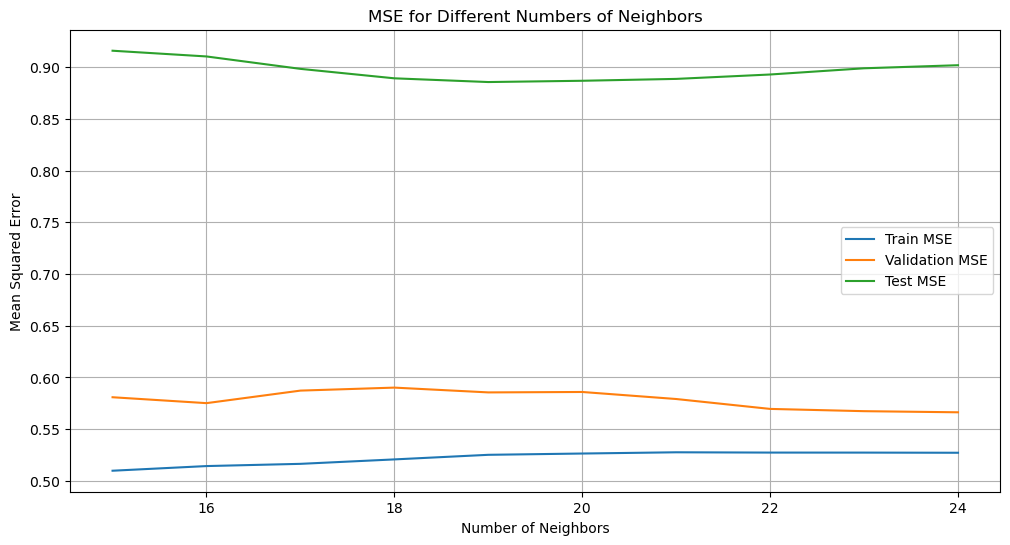

In [23]:
# Perform K-Fold Cross Validation
numNeighbors = [15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
kf = KFold(n_splits=10, shuffle=True)

trainMSE = []
valMSE = []
testMSE = []

for neighbor in numNeighbors:
    train_fold_MSE = []
    val_fold_MSE = []
    test_MSE = []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        reg = KNeighborsRegressor(n_neighbors=neighbor, metric='minkowski', p=2, algorithm='kd_tree')
        reg.fit(X_train_fold, y_train_fold)

        y_train_fold_pred = reg.predict(X_train_fold)
        y_val_fold_pred = reg.predict(X_val_fold)
        y_test_pred = reg.predict(X_test)

        MSE_train_fold = mean_squared_error(y_train_fold, y_train_fold_pred)
        MSE_val_fold = mean_squared_error(y_val_fold, y_val_fold_pred)
        MSE_test = mean_squared_error(y_test, y_test_pred)

        train_fold_MSE.append(MSE_train_fold)
        val_fold_MSE.append(MSE_val_fold)
        test_MSE.append(MSE_test)

    trainMSE.append(np.mean(train_fold_MSE))
    valMSE.append(np.mean(val_fold_MSE))
    testMSE.append(np.mean(test_MSE))
    print('neighbor: {:6} | MSE_train_fold: {:6} | MSE_val_fold: {:6} | MSE_test: {:6}'.
          format(neighbor, round(np.mean(train_fold_MSE), 6), round(np.mean(val_fold_MSE), 6), round(np.mean(test_MSE), 6)))

plt.figure(figsize=(12, 6))
plt.plot(numNeighbors, trainMSE, label='Train MSE')
plt.plot(numNeighbors, valMSE, label='Validation MSE')
plt.plot(numNeighbors, testMSE, label='Test MSE')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different Numbers of Neighbors')
plt.legend()
plt.grid(True)
plt.show()
#Chọn số neighbor tốt nhất là 17

In [24]:
# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
train_mse_lr = mean_squared_error(y_train, y_pred_train)
test_mse_lr = mean_squared_error(y_test, y_pred_test)
# Decision Tree model
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
train_mse_dt = mean_squared_error(y_train, y_pred_train)
test_mse_dt = mean_squared_error(y_test, y_pred_test)
# Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
train_mse_rf = mean_squared_error(y_train, y_pred_train)
test_mse_rf = mean_squared_error(y_test, y_pred_test)
# Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=1)
gb.fit(X_train, y_train)
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
train_mse_gb = mean_squared_error(y_train, y_pred_train)
test_mse_gb = mean_squared_error(y_test, y_pred_test)
# Support Vector Regressor model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)
train_mse_svr = mean_squared_error(y_train, y_pred_train)
test_mse_svr = mean_squared_error(y_test, y_pred_test)
# Neural Network model
nn = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=1)
nn.fit(X_train, y_train)
y_pred_train = nn.predict(X_train)
y_pred_test = nn.predict(X_test)
train_mse_nn = mean_squared_error(y_train, y_pred_train)
test_mse_nn = mean_squared_error(y_test, y_pred_test)

print(f"Linear Regression - Train MSE: {train_mse_lr}, Test MSE: {test_mse_lr}")
print(f"Decision Tree - Train MSE: {train_mse_dt}, Test MSE: {test_mse_dt}")
print(f"Random Forest - Train MSE: {train_mse_rf}, Test MSE: {test_mse_rf}")
print(f"Gradient Boosting - Train MSE: {train_mse_gb}, Test MSE: {test_mse_gb}")
print(f"Support Vector Regressor - Train MSE: {train_mse_svr}, Test MSE: {test_mse_svr}")
print(f"Neural Network - Train MSE: {train_mse_nn}, Test MSE: {test_mse_nn}")

Linear Regression - Train MSE: 0.5360343000391016, Test MSE: 0.9301029259823841
Decision Tree - Train MSE: 1.9027800728949028e-31, Test MSE: 1.6775540000000004
Random Forest - Train MSE: 0.0866708628643216, Test MSE: 0.9668634970000004
Gradient Boosting - Train MSE: 0.20004509567727216, Test MSE: 1.0021125369289785
Support Vector Regressor - Train MSE: 0.008895038945018396, Test MSE: 0.9133193371173383
Neural Network - Train MSE: 13.63200909314769, Test MSE: 15.56661192524917


### Kết luận
- Gradient Boosting cho kết quả tốt nhất trong các phương pháp

### Kiểm chứng mô hình bằng thực nghiệm

In [25]:
last_10_data = FPT_daily[inputCols].tail(10)
predictions = gb.predict(last_10_data)
results = pd.DataFrame({
    'Date': FPT_daily['Date'].tail(10).values,
    'Biến động giá cổ phiếu thực tế': FPT_daily['Value_difference'].tail(10).values,
    'Biến động giá cổ phiếu': predictions
})
results['Sai sót trong dự đoán'] = results['Biến động giá cổ phiếu'] - results['Biến động giá cổ phiếu thực tế']
print(results)

         Date  Biến động giá cổ phiếu thực tế  Biến động giá cổ phiếu  \
0  2020-12-08                             0.5                0.369593   
1  2020-12-09                             1.0                0.600920   
2  2020-12-10                            -0.7               -0.370292   
3  2020-12-11                             0.4                0.462374   
4  2020-12-14                             0.5                0.333101   
5  2020-12-15                            -0.3               -0.177195   
6  2020-12-16                            -0.4               -0.141024   
7  2020-12-17                             0.0               -0.019626   
8  2020-12-18                             0.6                0.617614   
9  2020-12-21                             0.0                0.048853   

   Sai sót trong dự đoán  
0              -0.130407  
1              -0.399080  
2               0.329708  
3               0.062374  
4              -0.166899  
5               0.122805  
6      